In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1.	Data Collection

In [3]:
df=pd.read_csv(r"C:\Users\Harshal Malve\Documents\BIA -Class\Capstone project\Automobile\imports_85_data.csv",encoding='unicode_escape')


In [4]:
df.head()


,col2,Make_Car_Manufacturer,Fuel_Type,Aspiration,Number_of_Doors,Body_Style,Drive_Wheels,Engine_Location,Wheelbase_inches,Length_inches,...,Fuel_System,Bore_Ratio,Stroke,Compression_Ratio,Horsepower,Peak_RPM,City_MPG,Highway_MPG,Price_Dollars,Coumn_Z
0,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,3
1,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,3
2,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,1
3,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,2
4,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   col2                    164 non-null    float64
 1   Make_Car_Manufacturer   205 non-null    object 
 2   Fuel_Type               205 non-null    object 
 3   Aspiration              205 non-null    object 
 4   Number_of_Doors         205 non-null    object 
 5   Body_Style              205 non-null    object 
 6   Drive_Wheels            205 non-null    object 
 7   Engine_Location         205 non-null    object 
 8   Wheelbase_inches        205 non-null    float64
 9   Length_inches           205 non-null    float64
 10  Width_inches            205 non-null    float64
 11  Height_inches           205 non-null    float64
 12  Curb_Weight_pounds      205 non-null    int64  
 13  Engine_Type             205 non-null    object 
 14  Number_of_Cylinders     205 non-null    ob

##  2.	Data Preprocessing

In [6]:
df.isnull().sum()  #handling missing values

col2                      41
Make_Car_Manufacturer      0
Fuel_Type                  0
Aspiration                 0
Number_of_Doors            0
Body_Style                 0
Drive_Wheels               0
Engine_Location            0
Wheelbase_inches           0
Length_inches              0
Width_inches               0
Height_inches              0
Curb_Weight_pounds         0
Engine_Type                0
Number_of_Cylinders        0
EngineSize_cubicinches     0
Fuel_System                0
Bore_Ratio                 4
Stroke                     4
Compression_Ratio          0
Horsepower                 2
Peak_RPM                   2
City_MPG                   0
Highway_MPG                0
Price_Dollars              4
Coumn_Z                    0
dtype: int64

<Axes: >

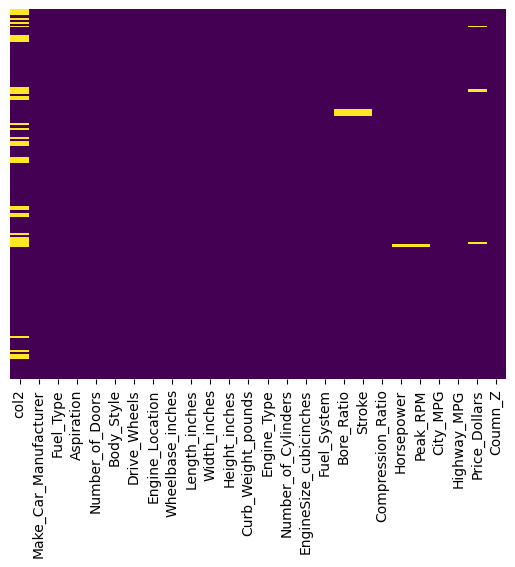

In [7]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')


In [8]:
 df.drop('col2',axis=1,inplace=True)

In [9]:
print(df.columns)

Index(['Make_Car_Manufacturer', 'Fuel_Type', 'Aspiration', 'Number_of_Doors',
       'Body_Style', 'Drive_Wheels', 'Engine_Location', 'Wheelbase_inches',
       'Length_inches', 'Width_inches', 'Height_inches', 'Curb_Weight_pounds',
       'Engine_Type', 'Number_of_Cylinders', 'EngineSize_cubicinches',
       'Fuel_System', 'Bore_Ratio', 'Stroke', 'Compression_Ratio',
       'Horsepower', 'Peak_RPM', 'City_MPG', 'Highway_MPG', 'Price_Dollars',
       'Coumn_Z'],
      dtype='object')


In [10]:
#filling Null values of 'Price_Dollars' with avrage cost of vehicles with specific 'Number_of_Cylinders'
dfavg_price_series = df.groupby('Number_of_Cylinders')['Price_Dollars'].mean()

In [11]:
dfavg_price_series

Number_of_Cylinders
eight     38900.000000
five      22007.600000
four      10303.197452
six       23671.833333
three      5151.000000
twelve    36000.000000
two       13020.000000
Name: Price_Dollars, dtype: float64

In [12]:
def impute_Price(cols):
    Price_Dollars = cols[0]
    Number_of_Cylinders = cols[1]
    
    if pd.isnull(Price_Dollars):

        if Number_of_Cylinders == "eight":
            return 38900

        elif Number_of_Cylinders == "five":
            return 22007.60

        elif Number_of_Cylinders == "four":
            return 10303.19

        elif Number_of_Cylinders == "six":
            return 23671.83

        elif Number_of_Cylinders == "three":
            return 5151

        elif Number_of_Cylinders == "twelve":
            return 36000

        elif Number_of_Cylinders == "two":
            return 13020

    else:
        return Price_Dollars

In [13]:
df['Price_Dollars'] = df[['Price_Dollars','Number_of_Cylinders']].apply(impute_Price,axis=1)

C:\Users\Harshal Malve\AppData\Local\Temp\ipykernel_15976\903743149.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Price_Dollars = cols[0]
C:\Users\Harshal Malve\AppData\Local\Temp\ipykernel_15976\903743149.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Number_of_Cylinders = cols[1]


<Axes: >

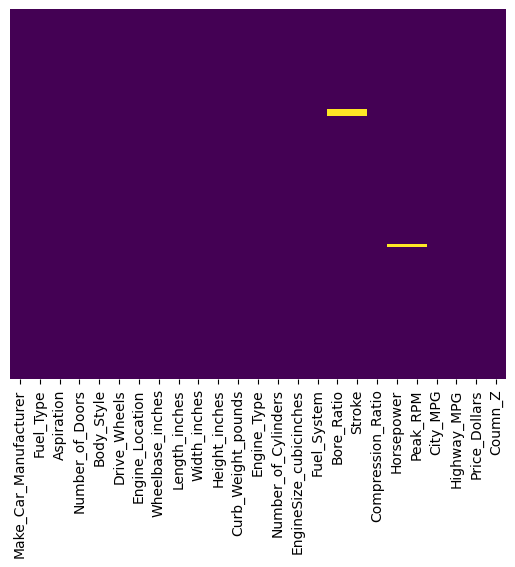

In [14]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [15]:
#Rotory engines defies the traditional bore and stroke conventions.                                                      
#but we can not keep the cell Empty hence we are using best way to fill it which is KNN Imputation (k-nearest neighbors).
#KNN Locates the k nearest data points (neighbors) based on similarity (usually Euclidean distance). - Checks their values for the missing feature. - 
#Takes an average (or weighted average) of those values.

from sklearn.impute import KNNImputer

In [16]:
imputer = KNNImputer(n_neighbors=20)  # Choose an appropriate value for 'n_neighbors'
imputed_values = imputer.fit_transform(df[['Bore_Ratio', 'Stroke']])  ## Fit and transform the imputer on your original DataFrame
df_imputed = pd.DataFrame(imputed_values, columns=['Bore_Ratio', 'Stroke'])   #The DataFrame is a fundamental data structure provided by the Pandas library in Python. 
df.update(df_imputed)

In [17]:
#Peak Rpm and Horsepower is also has some NaN values and if we take avrage of any parameters it could be "Engine size".
#but we can not take average parameters from Engine size as it is not catgorical hence decided to go with KNN Imputation 
#for Empty cells in Peak RPM and Horsepower.


imputed_values = imputer.fit_transform(df[['Peak_RPM', 'Horsepower']])
df_imputed = pd.DataFrame(imputed_values, columns=['Peak_RPM', 'Horsepower'])   #The DataFrame is a fundamental data structure provided by the Pandas library in Python. 
df.update(df_imputed)


In [18]:
df.isnull().sum()

Make_Car_Manufacturer     0
Fuel_Type                 0
Aspiration                0
Number_of_Doors           0
Body_Style                0
Drive_Wheels              0
Engine_Location           0
Wheelbase_inches          0
Length_inches             0
Width_inches              0
Height_inches             0
Curb_Weight_pounds        0
Engine_Type               0
Number_of_Cylinders       0
EngineSize_cubicinches    0
Fuel_System               0
Bore_Ratio                0
Stroke                    0
Compression_Ratio         0
Horsepower                0
Peak_RPM                  0
City_MPG                  0
Highway_MPG               0
Price_Dollars             0
Coumn_Z                   0
dtype: int64

In [19]:
df.head()

,Make_Car_Manufacturer,Fuel_Type,Aspiration,Number_of_Doors,Body_Style,Drive_Wheels,Engine_Location,Wheelbase_inches,Length_inches,Width_inches,...,Fuel_System,Bore_Ratio,Stroke,Compression_Ratio,Horsepower,Peak_RPM,City_MPG,Highway_MPG,Price_Dollars,Coumn_Z
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,3
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,3
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,1
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,2
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,2


In [20]:
print(df['Fuel_Type'].unique())
print(df['Number_of_Doors'].unique())  #replace '?"
print(df['Body_Style'].unique())
print(df['Drive_Wheels'].unique())
print(df['Engine_Location'].unique())
print(df['Engine_Type'].unique())
print(df['Number_of_Cylinders'].unique())
print(df['Fuel_System'].unique())


['gas' 'diesel']
['two' 'four' '?']
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['rwd' 'fwd' '4wd']
['front' 'rear']
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


In [21]:
#Deleting '?' from " Number_of_Doors

#replace the symbol ‘?’ with NaN (missing values) in a column of a DataFrame
df['Number_of_Doors'] = df['Number_of_Doors'].replace('?', float('nan'))

#Replace missing values with the most frequent category (mode) within the column.
#This approach maintains the existing distribution of categories.
df['Number_of_Doors'].fillna(df['Number_of_Doors'].mode()[0], inplace=True)
print(df['Number_of_Doors'].unique()) 
df['Number_of_Doors'].value_counts()

['two' 'four']


Number_of_Doors
four    116
two      89
Name: count, dtype: int64

#<font size="4"> Encoding </font>

#<font size="2">
 *****We’ll use Lable encoding for the following columns:
'Fuel_Type'                                               
'Aspiration'                                               
'Number_of_Doors'                                             
'Drive_Wheels'                                                
'Engine_Location'                                           
'Number_of_Cylinders'                                        
Reason: hot-not encoding was causing “curse of dimensionality” (too much colums) and encding with 0,1,2.... per weightage on Car price. </font>



#<font size="2">
*****We’ll apply frequency encoding to the following columns:                       
'Make_Car_Manufacturer'                               
'Body_Style'                                 
'Engine_Type'                          
'Fuel_System'rs'                                      
Reason: These columns have multiple categories, and frequency encoding assigns values based on the relative occurrence of each category. </font>


In [22]:
print(df['Fuel_Type'].unique())
print(df['Number_of_Doors'].unique())  #replace '?"
print(df['Body_Style'].unique())
print(df['Drive_Wheels'].unique())
print(df['Engine_Location'].unique())
print(df['Engine_Type'].unique())
print(df['Number_of_Cylinders'].unique())
print(df['Fuel_System'].unique())
print(df['Aspiration'].unique())
print(df['Number_of_Cylinders'].unique())


['gas' 'diesel']
['two' 'four']
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['rwd' 'fwd' '4wd']
['front' 'rear']
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']
['std' 'turbo']
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']


In [23]:
#'Fuel_Type', 'Aspiration' ,'Number_of_Doors' ,'Drive_Wheels' ,'Engine_Location'
df.replace({'Fuel_Type':{'gas':0,'diesel':1}},inplace=True)
df.replace({'Aspiration':{'std':0,'turbo':1}},inplace=True)
df.replace({'Number_of_Doors':{'two':0,'four':1}},inplace=True)
df.replace({'Drive_Wheels':{'rwd':2,'fwd':0,'4wd':1}},inplace=True)
df.replace({'Engine_Location':{'front':0,'rear':1}},inplace=True)
df.replace({'Number_of_Cylinders':{'four':2,'six':5,'five':4,'three':1,'twelve':7,'two':3,'eight':6}},inplace=True)
df

,Make_Car_Manufacturer,Fuel_Type,Aspiration,Number_of_Doors,Body_Style,Drive_Wheels,Engine_Location,Wheelbase_inches,Length_inches,Width_inches,...,Fuel_System,Bore_Ratio,Stroke,Compression_Ratio,Horsepower,Peak_RPM,City_MPG,Highway_MPG,Price_Dollars,Coumn_Z
0,alfa-romero,0,0,0,convertible,2,0,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,3
1,alfa-romero,0,0,0,convertible,2,0,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,3
2,alfa-romero,0,0,0,hatchback,2,0,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,1
3,audi,0,0,1,sedan,0,0,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,2
4,audi,0,0,1,sedan,1,0,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo,0,0,1,sedan,2,0,109.1,188.8,68.9,...,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0,-1
201,volvo,0,1,1,sedan,2,0,109.1,188.8,68.8,...,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0,-1
202,volvo,0,0,1,sedan,2,0,109.1,188.8,68.9,...,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0,-1
203,volvo,1,1,1,sedan,2,0,109.1,188.8,68.9,...,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0,-1


In [24]:
selected_columns = ['Make_Car_Manufacturer','Body_Style' ,'Engine_Type', 'Fuel_System' ]

for col in selected_columns:
    category_counts = df[col].value_counts()
    category_mapping = category_counts.to_dict()
    df[f'{col}_FrequencyEncoded'] = df[col].map(category_mapping)

df

,Make_Car_Manufacturer,Fuel_Type,Aspiration,Number_of_Doors,Body_Style,Drive_Wheels,Engine_Location,Wheelbase_inches,Length_inches,Width_inches,...,Horsepower,Peak_RPM,City_MPG,Highway_MPG,Price_Dollars,Coumn_Z,Make_Car_Manufacturer_FrequencyEncoded,Body_Style_FrequencyEncoded,Engine_Type_FrequencyEncoded,Fuel_System_FrequencyEncoded
0,alfa-romero,0,0,0,convertible,2,0,88.6,168.8,64.1,...,111.0,5000.0,21,27,13495.0,3,3,6,12,94
1,alfa-romero,0,0,0,convertible,2,0,88.6,168.8,64.1,...,111.0,5000.0,21,27,16500.0,3,3,6,12,94
2,alfa-romero,0,0,0,hatchback,2,0,94.5,171.2,65.5,...,154.0,5000.0,19,26,16500.0,1,3,70,13,94
3,audi,0,0,1,sedan,0,0,99.8,176.6,66.2,...,102.0,5500.0,24,30,13950.0,2,7,96,148,94
4,audi,0,0,1,sedan,1,0,99.4,176.6,66.4,...,115.0,5500.0,18,22,17450.0,2,7,96,148,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo,0,0,1,sedan,2,0,109.1,188.8,68.9,...,114.0,5400.0,23,28,16845.0,-1,11,96,148,94
201,volvo,0,1,1,sedan,2,0,109.1,188.8,68.8,...,160.0,5300.0,19,25,19045.0,-1,11,96,148,94
202,volvo,0,0,1,sedan,2,0,109.1,188.8,68.9,...,134.0,5500.0,18,23,21485.0,-1,11,96,13,94
203,volvo,1,1,1,sedan,2,0,109.1,188.8,68.9,...,106.0,4800.0,26,27,22470.0,-1,11,96,148,20


In [25]:
#Droping original colums with Objecs(Str)

# 'Make_Car_Manufacturer' ,'Body_Style' ,'Engine_Type' ,'Number_of_Cylinders', 'Fuel_System'
# 'Fuel_Type', 'Aspiration' ,'Number_of_Doors' ,'Drive_Wheels' ,'Engine_Location'

df = df.drop(['Make_Car_Manufacturer','Body_Style' ,'Engine_Type' , 'Fuel_System' ], axis=1)
df

,Fuel_Type,Aspiration,Number_of_Doors,Drive_Wheels,Engine_Location,Wheelbase_inches,Length_inches,Width_inches,Height_inches,Curb_Weight_pounds,...,Horsepower,Peak_RPM,City_MPG,Highway_MPG,Price_Dollars,Coumn_Z,Make_Car_Manufacturer_FrequencyEncoded,Body_Style_FrequencyEncoded,Engine_Type_FrequencyEncoded,Fuel_System_FrequencyEncoded
0,0,0,0,2,0,88.6,168.8,64.1,48.8,2548,...,111.0,5000.0,21,27,13495.0,3,3,6,12,94
1,0,0,0,2,0,88.6,168.8,64.1,48.8,2548,...,111.0,5000.0,21,27,16500.0,3,3,6,12,94
2,0,0,0,2,0,94.5,171.2,65.5,52.4,2823,...,154.0,5000.0,19,26,16500.0,1,3,70,13,94
3,0,0,1,0,0,99.8,176.6,66.2,54.3,2337,...,102.0,5500.0,24,30,13950.0,2,7,96,148,94
4,0,0,1,1,0,99.4,176.6,66.4,54.3,2824,...,115.0,5500.0,18,22,17450.0,2,7,96,148,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,0,1,2,0,109.1,188.8,68.9,55.5,2952,...,114.0,5400.0,23,28,16845.0,-1,11,96,148,94
201,0,1,1,2,0,109.1,188.8,68.8,55.5,3049,...,160.0,5300.0,19,25,19045.0,-1,11,96,148,94
202,0,0,1,2,0,109.1,188.8,68.9,55.5,3012,...,134.0,5500.0,18,23,21485.0,-1,11,96,13,94
203,1,1,1,2,0,109.1,188.8,68.9,55.5,3217,...,106.0,4800.0,26,27,22470.0,-1,11,96,148,20


In [26]:
#moving price Column to last for beter understanding

price_column = df.pop('Price_Dollars')  # Remove the "price" column
df.insert(len(df.columns), 'Price_Dollars', price_column)  # Insert it at the last position

## 3.	Feature Engineering

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Fuel_Type                               205 non-null    int64  
 1   Aspiration                              205 non-null    int64  
 2   Number_of_Doors                         205 non-null    int64  
 3   Drive_Wheels                            205 non-null    int64  
 4   Engine_Location                         205 non-null    int64  
 5   Wheelbase_inches                        205 non-null    float64
 6   Length_inches                           205 non-null    float64
 7   Width_inches                            205 non-null    float64
 8   Height_inches                           205 non-null    float64
 9   Curb_Weight_pounds                      205 non-null    int64  
 10  Number_of_Cylinders                     205 non-null    int64 

In [28]:
df.describe()

,Fuel_Type,Aspiration,Number_of_Doors,Drive_Wheels,Engine_Location,Wheelbase_inches,Length_inches,Width_inches,Height_inches,Curb_Weight_pounds,...,Horsepower,Peak_RPM,City_MPG,Highway_MPG,Coumn_Z,Make_Car_Manufacturer_FrequencyEncoded,Body_Style_FrequencyEncoded,Engine_Type_FrequencyEncoded,Fuel_System_FrequencyEncoded,Price_Dollars
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.00000,205.000000,205.000000,205.000000,205.000000
mean,0.097561,0.180488,0.565854,0.785366,0.014634,98.756585,174.049268,65.907805,53.724878,2555.565854,...,104.256158,5125.369458,25.219512,30.751220,0.834146,14.24878,72.395122,110.258537,67.341463,13347.058439
std,0.297446,0.385535,0.496858,0.956290,0.120377,6.021776,12.337289,2.145204,2.443522,520.680204,...,39.519211,476.979093,6.542142,6.886443,1.245307,8.67109,28.839736,60.985023,31.195156,8099.139500
min,0.000000,0.000000,0.000000,0.000000,0.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,...,48.000000,4150.000000,13.000000,16.000000,-2.000000,1.00000,6.000000,1.000000,1.000000,5118.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,...,70.000000,4800.000000,19.000000,25.000000,0.000000,8.00000,70.000000,15.000000,66.000000,7788.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,...,95.000000,5200.000000,24.000000,30.000000,1.000000,12.00000,70.000000,148.000000,66.000000,10303.190000
75%,0.000000,0.000000,1.000000,2.000000,0.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,...,116.000000,5500.000000,30.000000,34.000000,2.000000,17.00000,96.000000,148.000000,94.000000,16503.000000
max,1.000000,1.000000,1.000000,2.000000,1.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,...,288.000000,6600.000000,49.000000,54.000000,3.000000,32.00000,96.000000,148.000000,94.000000,45400.000000


In [29]:
df.corr()

,Fuel_Type,Aspiration,Number_of_Doors,Drive_Wheels,Engine_Location,Wheelbase_inches,Length_inches,Width_inches,Height_inches,Curb_Weight_pounds,...,Horsepower,Peak_RPM,City_MPG,Highway_MPG,Coumn_Z,Make_Car_Manufacturer_FrequencyEncoded,Body_Style_FrequencyEncoded,Engine_Type_FrequencyEncoded,Fuel_System_FrequencyEncoded,Price_Dollars
Fuel_Type,1.000000,0.401397,0.188496,0.108444,-0.040070,0.308346,0.212679,0.233880,0.284631,0.217275,...,-0.165190,-0.477060,0.255963,0.191392,-0.194311,0.017152,0.082914,0.020221,-0.500202,0.101378
Aspiration,0.401397,1.000000,0.052803,0.132180,-0.057191,0.257611,0.234539,0.300567,0.087311,0.324902,...,0.240182,-0.183629,-0.202362,-0.254416,-0.059866,-0.190924,0.040728,-0.019299,-0.305133,0.177930
Number_of_Doors,0.188496,0.052803,1.000000,-0.062958,-0.139129,0.439635,0.385675,0.197735,0.540286,0.190720,...,-0.128184,-0.240298,-0.014271,-0.037452,-0.663595,0.010401,0.240549,0.031548,0.084882,0.017442
Drive_Wheels,0.108444,0.132180,-0.062958,1.000000,0.155168,0.490310,0.535304,0.502621,0.071943,0.683192,...,0.570042,-0.108376,-0.567549,-0.596940,-0.091783,-0.053236,-0.165942,-0.440830,0.238927,0.630695
Engine_Location,-0.040070,-0.057191,-0.139129,0.155168,1.000000,-0.187790,-0.050989,-0.051698,-0.106234,0.050468,...,0.317610,0.198400,-0.153487,-0.102026,0.212471,-0.130304,-0.275601,-0.190822,0.104399,0.319487
Wheelbase_inches,0.308346,0.257611,0.439635,0.490310,-0.187790,1.000000,0.874587,0.795144,0.589435,0.776386,...,0.351957,-0.360704,-0.470414,-0.544082,-0.531954,-0.111284,0.092560,-0.204521,0.167886,0.568802
Length_inches,0.212679,0.234539,0.385675,0.535304,-0.050989,0.874587,1.000000,0.841118,0.491029,0.877728,...,0.554434,-0.287031,-0.670909,-0.704662,-0.357612,-0.150540,0.008815,-0.274458,0.298404,0.672603
Width_inches,0.233880,0.300567,0.197735,0.502621,-0.051698,0.795144,0.841118,1.000000,0.279210,0.867032,...,0.642195,-0.219859,-0.642704,-0.677218,-0.232919,-0.236780,0.020876,-0.289254,0.203591,0.763037
Height_inches,0.284631,0.087311,0.540286,0.071943,-0.106234,0.589435,0.491029,0.279210,1.000000,0.295572,...,-0.110137,-0.320602,-0.048640,-0.107358,-0.541038,0.024462,-0.037251,0.040967,0.117083,0.108763
Curb_Weight_pounds,0.217275,0.324902,0.190720,0.683192,0.050468,0.776386,0.877728,0.867032,0.295572,1.000000,...,0.750968,-0.266283,-0.757414,-0.797465,-0.227691,-0.215470,-0.111291,-0.414040,0.233395,0.831253


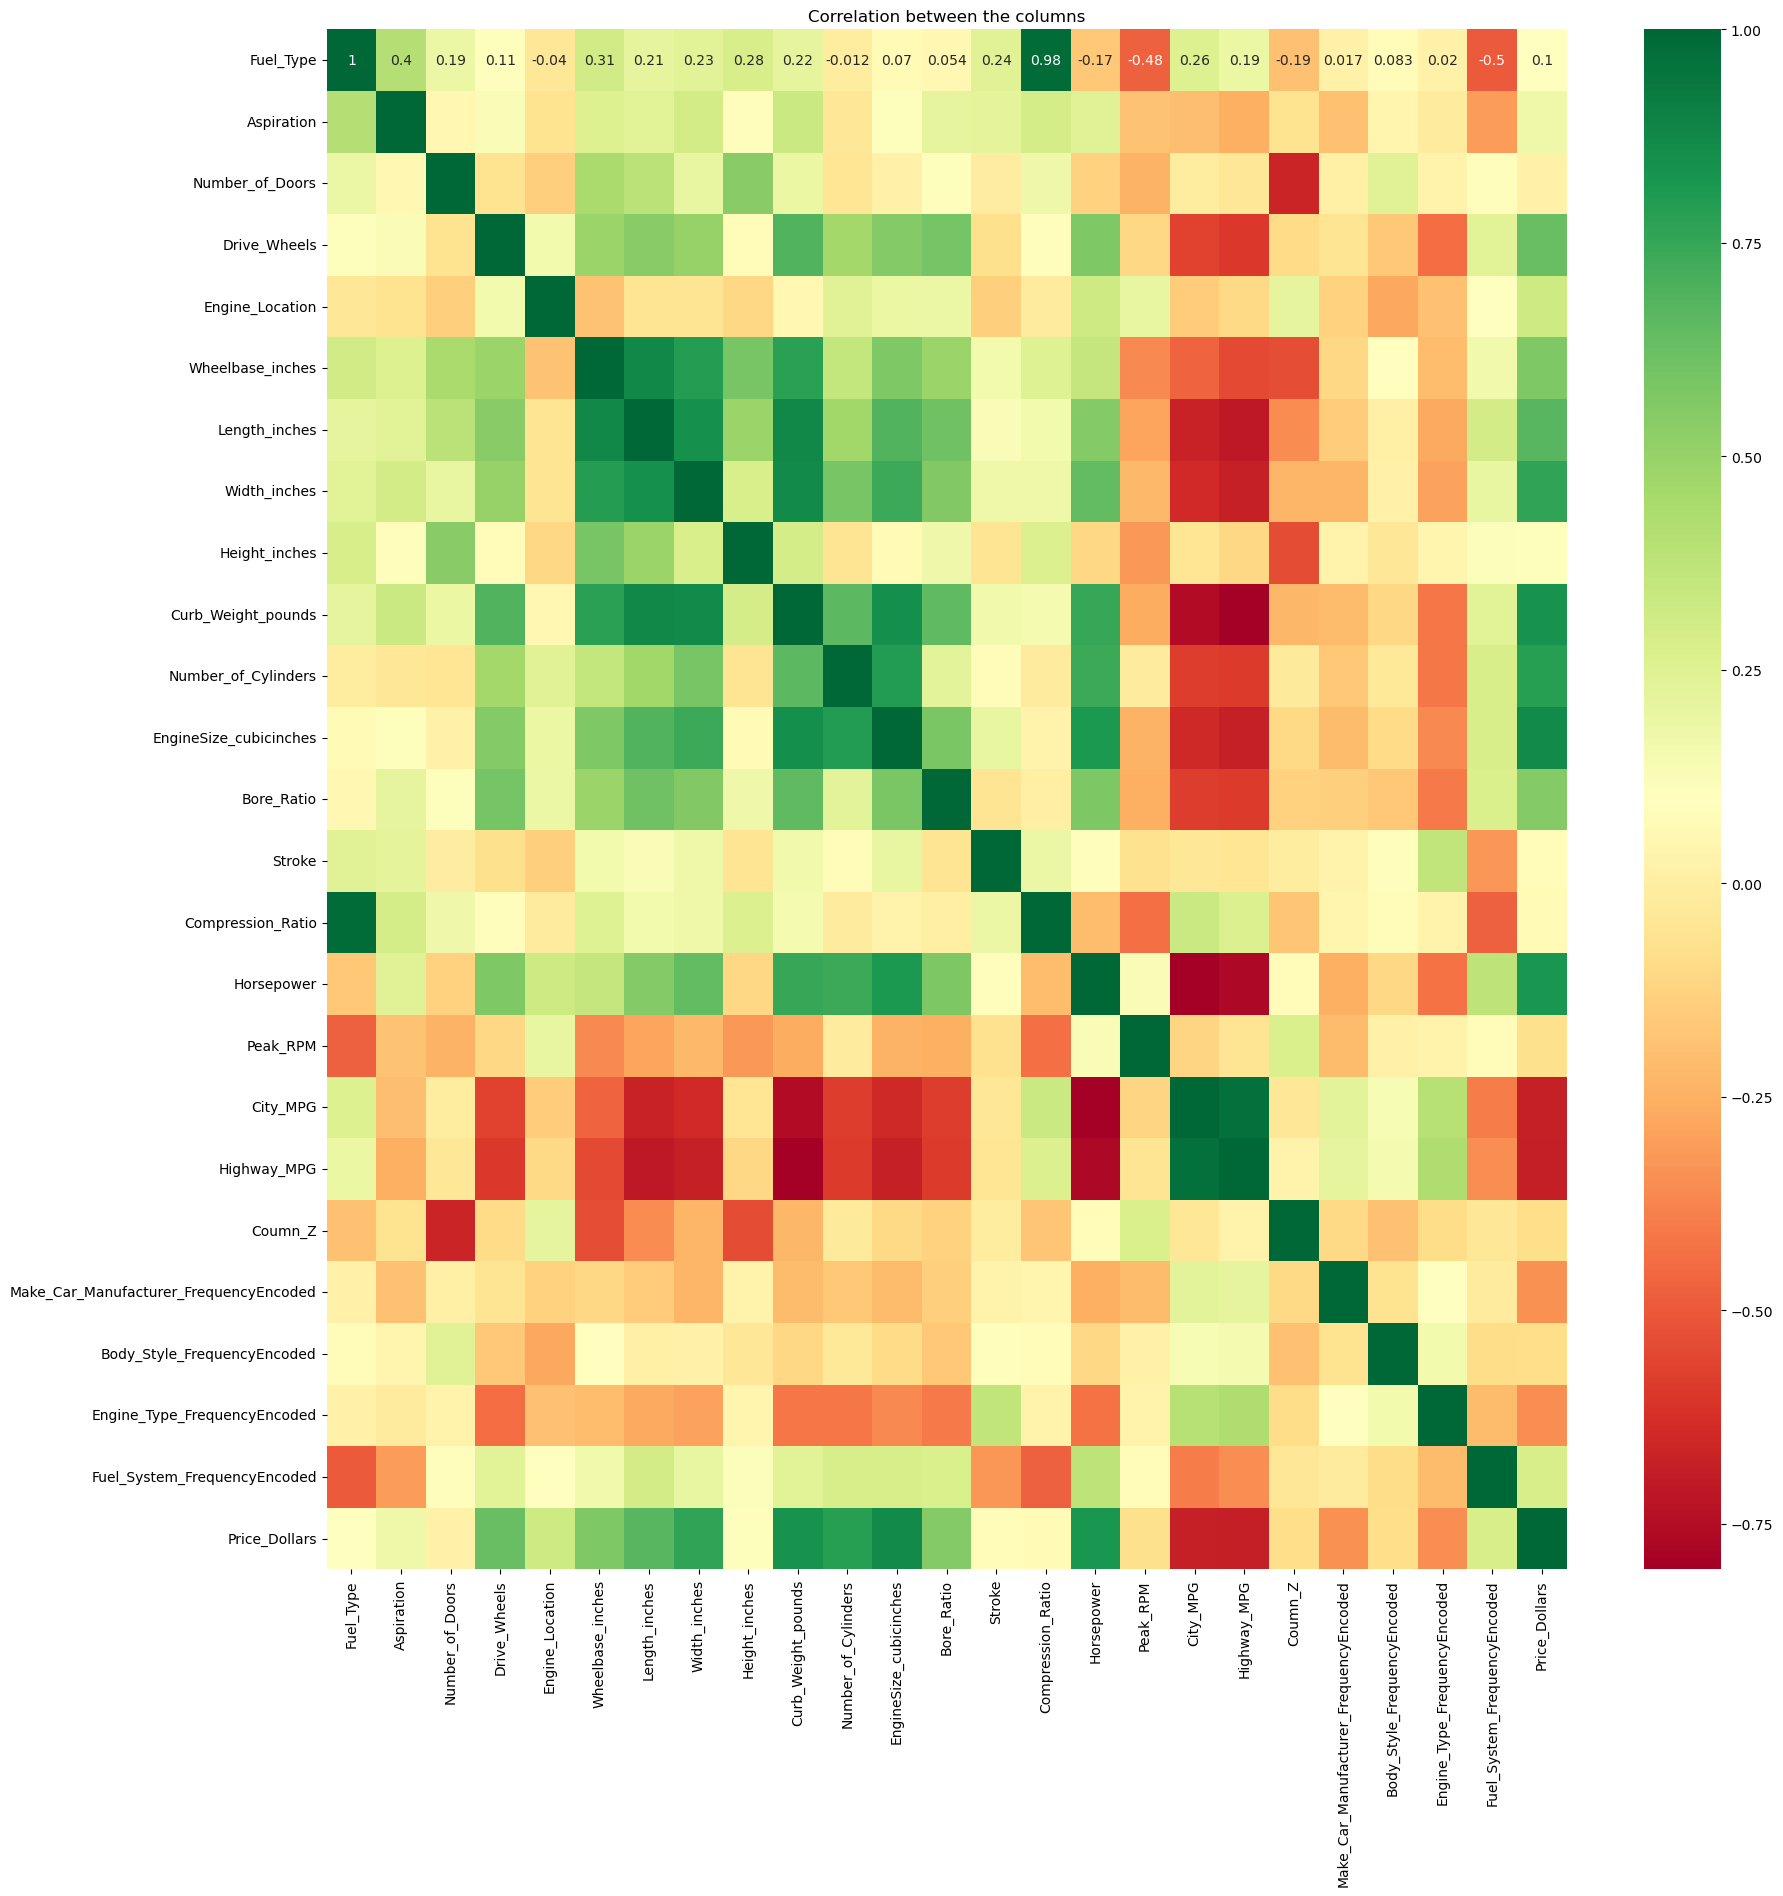

In [30]:
#Heatmap to check co-relation between the columns for Price of car.

plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True,cmap="RdYlGn")
plt.title('Correlation between the columns')
plt.show()

In [31]:
print(df.columns)

Index(['Fuel_Type', 'Aspiration', 'Number_of_Doors', 'Drive_Wheels',
       'Engine_Location', 'Wheelbase_inches', 'Length_inches', 'Width_inches',
       'Height_inches', 'Curb_Weight_pounds', 'Number_of_Cylinders',
       'EngineSize_cubicinches', 'Bore_Ratio', 'Stroke', 'Compression_Ratio',
       'Horsepower', 'Peak_RPM', 'City_MPG', 'Highway_MPG', 'Coumn_Z',
       'Make_Car_Manufacturer_FrequencyEncoded', 'Body_Style_FrequencyEncoded',
       'Engine_Type_FrequencyEncoded', 'Fuel_System_FrequencyEncoded',
       'Price_Dollars'],
      dtype='object')


In [32]:
#Deleing least co-related columns with price
df = df.drop('Fuel_Type', axis=1)
df = df.drop('Aspiration', axis=1)
df = df.drop('Number_of_Doors', axis=1)
df = df.drop('Engine_Location', axis=1)
df = df.drop('Height_inches', axis=1)
df = df.drop('Stroke', axis=1)
df = df.drop('Compression_Ratio', axis=1)
df = df.drop('Peak_RPM', axis=1)
df = df.drop('Coumn_Z', axis=1)
df = df.drop('Make_Car_Manufacturer_FrequencyEncoded', axis=1)
df = df.drop('Body_Style_FrequencyEncoded', axis=1)
df = df.drop('Fuel_System_FrequencyEncoded', axis=1)


A correlation of -0.65/-0.68 (city_MPG,Highway_MPG with Car price).
Here’s how we might interpret it:
When  fuel efficiency (MPG) increases (meaning lower fuel consumption), car prices tend to be Lower- Most of the vehicles are  performance based hence Higher the engine size lower the fuel eff. lower the fuel eff. means Higher the Car price.

likewise, gas-guzzlers might be associated with Higher prices.

Hence Keeping City_Mpg,Highway_MPG

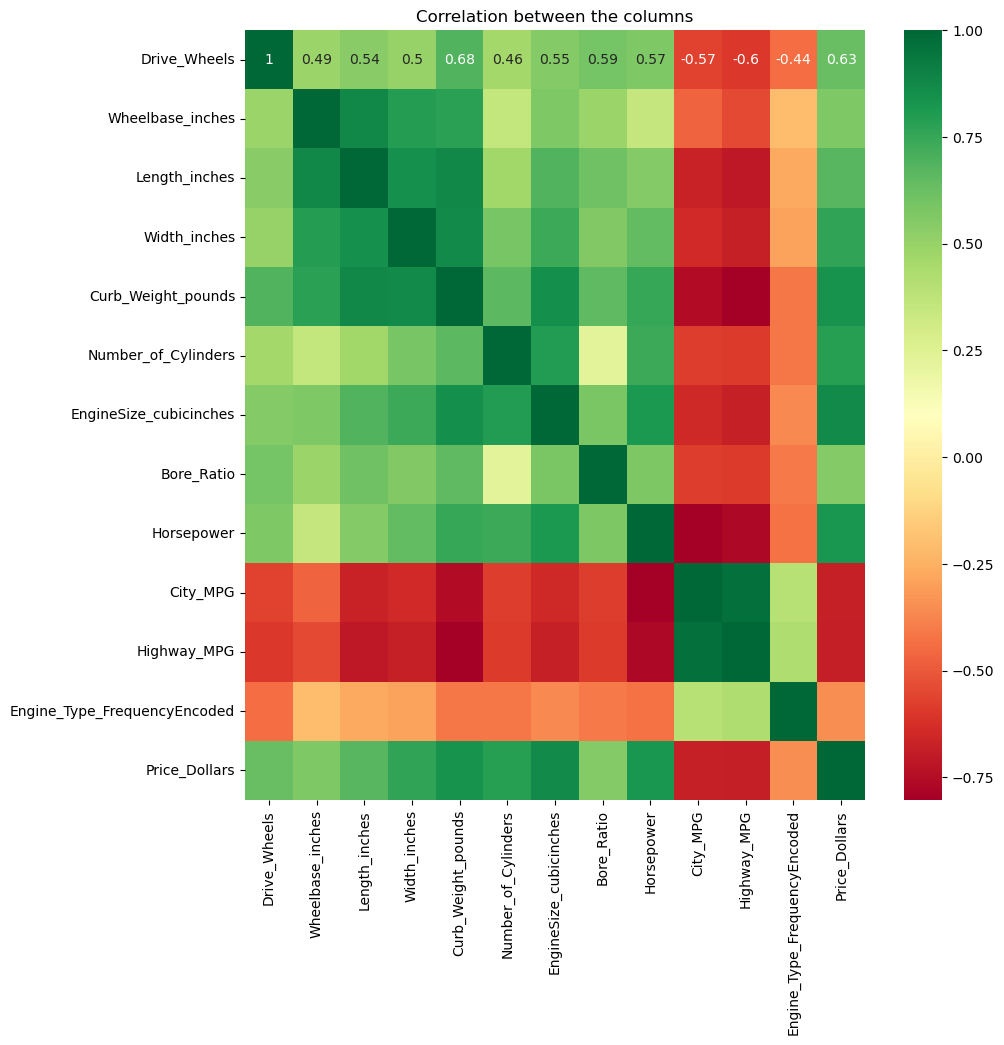

In [33]:
#Heatmap to check co-relation between the columns for Price of car.

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True,cmap="RdYlGn")
plt.title('Correlation between the columns')
plt.show()

C:\Users\Harshal Malve\AppData\Local\Temp\ipykernel_15976\1154449209.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], ax=axes[i], label=f'Data {i+1}')
C:\Users\Harshal Malve\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Harshal Malve\AppData\Local\Temp\ipykernel_15976\1154449209.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `disp

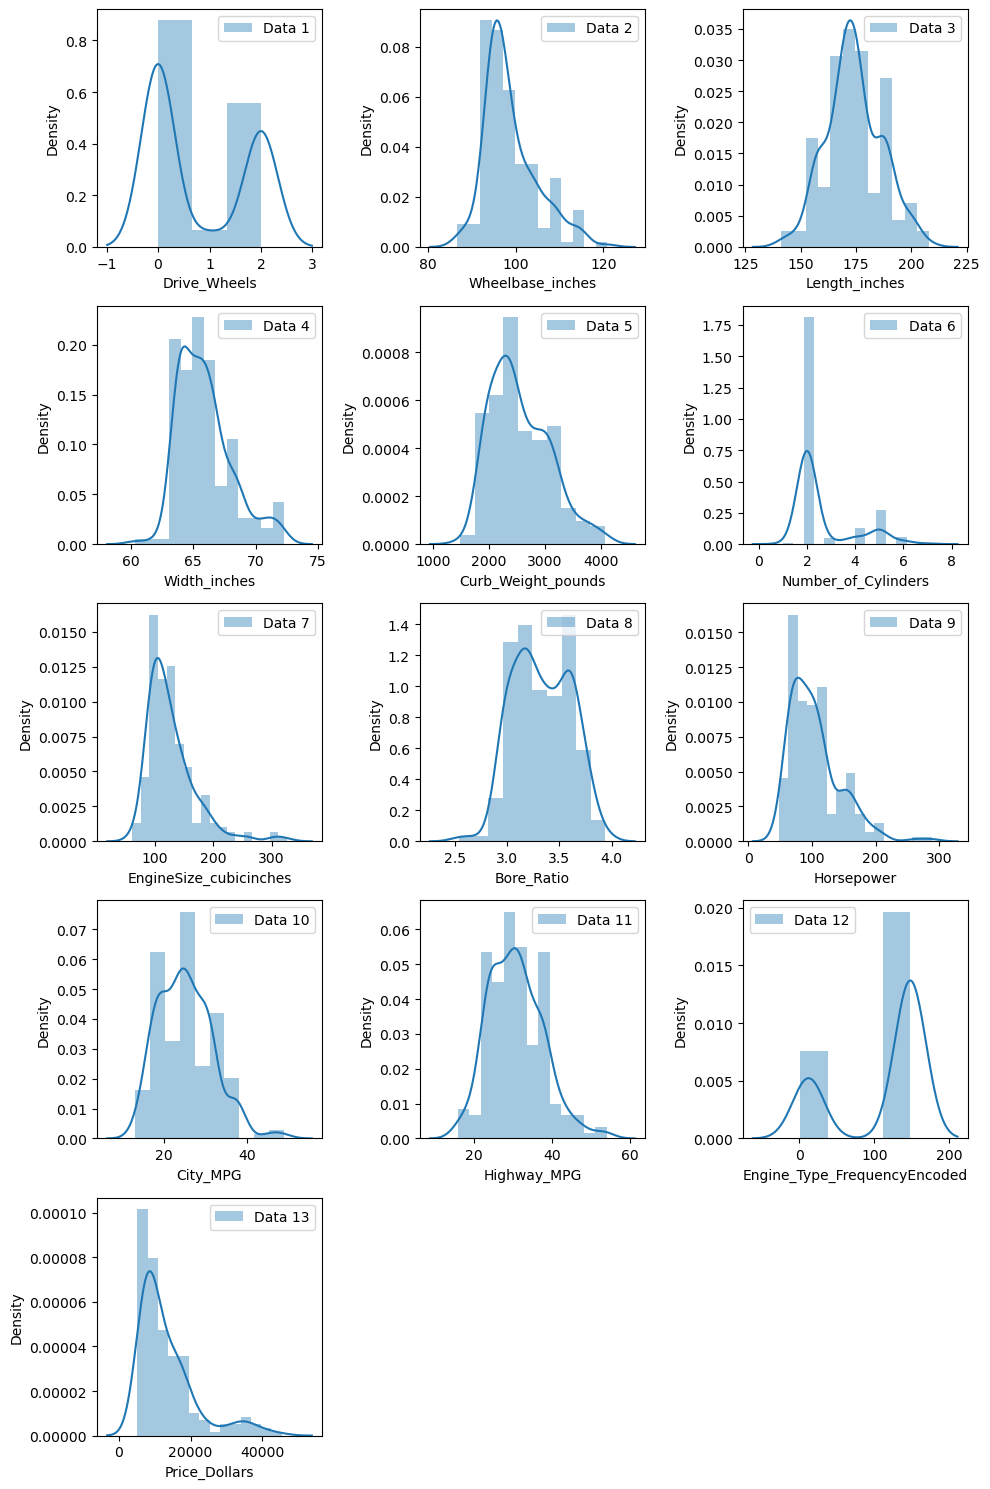

In [34]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
num_subplots = len(numeric_columns)

# Calculate the number of rows and columns for subplots
num_rows = 5  # You can adjust this based on your preference
num_cols = (num_subplots + num_rows - 1) // num_rows

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 15))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Plot the density plots for each numeric column
for i, col in enumerate(numeric_columns):
    sns.distplot(df[col], ax=axes[i], label=f'Data {i+1}')
    
    axes[i].legend()

# Hide any unused subplots
for j in range(num_subplots, num_rows * num_cols):
    axes[j].axis('off')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

In [35]:
#Log-Transformation
#Log transformation compresses large values and stretches small ones. It’s like fitting everyone into the same dance frame.
#linear regression appreciate normally distributed data. Log transformation nudges them in that direction.
#we can observe from above charts 'Wheelbase_inches', 'EngineSize_cubicinches','Horsepower', 'Price_Dollars' left skewd.

In [36]:
df["Wheelbase_inchesLOG"] = np.log(df['Wheelbase_inches'])
df["EngineSize_cubicinchesLOG"] = np.log(df['EngineSize_cubicinches'])
df["HorsepowerLOG"] = np.log(df['Horsepower'])
df["Price_DollarsLOG"] = np.log(df['Price_Dollars'])

In [37]:
selected_columns = ['Wheelbase_inches', 'EngineSize_cubicinches','Horsepower', 'Price_Dollars']

C:\Users\Harshal Malve\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Harshal Malve\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Harshal Malve\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Harshal Malve\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

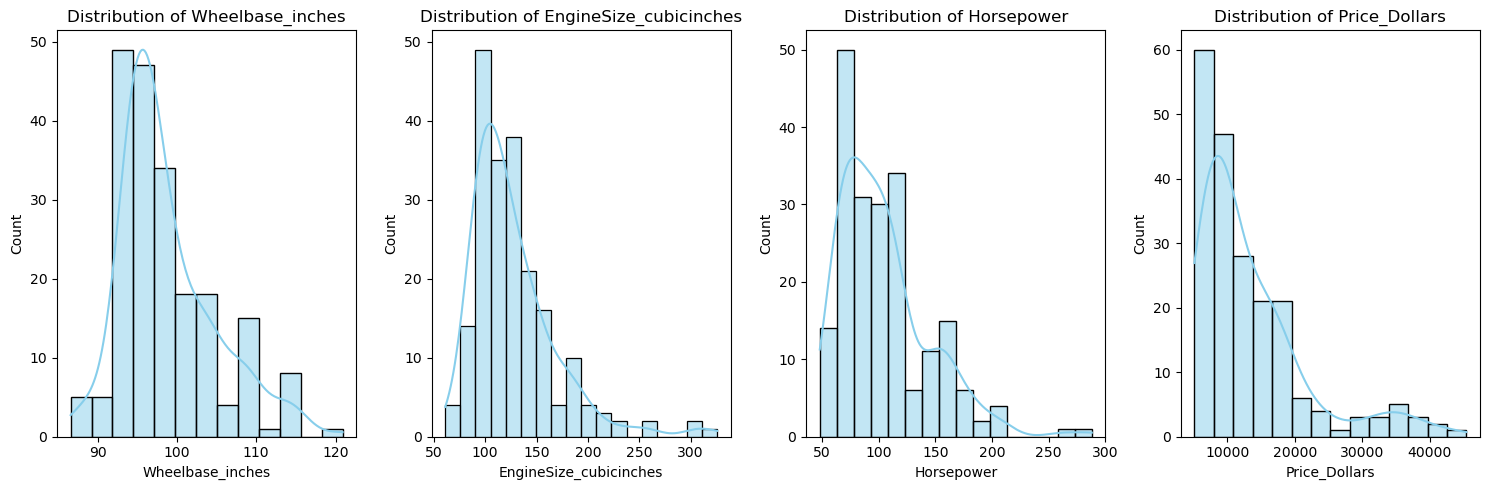

In [38]:
fig, axes = plt.subplots(nrows=1, ncols=len(selected_columns), figsize=(15, 5))

for i, col in enumerate(selected_columns):
    sns.histplot(df[col], ax=axes[i], kde=True, color='skyblue')
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


In [39]:
selected_columns1 = ['Wheelbase_inchesLOG', 'EngineSize_cubicinchesLOG','HorsepowerLOG', 'Price_DollarsLOG']

In [40]:
df.columns

Index(['Drive_Wheels', 'Wheelbase_inches', 'Length_inches', 'Width_inches',
       'Curb_Weight_pounds', 'Number_of_Cylinders', 'EngineSize_cubicinches',
       'Bore_Ratio', 'Horsepower', 'City_MPG', 'Highway_MPG',
       'Engine_Type_FrequencyEncoded', 'Price_Dollars', 'Wheelbase_inchesLOG',
       'EngineSize_cubicinchesLOG', 'HorsepowerLOG', 'Price_DollarsLOG'],
      dtype='object')

C:\Users\Harshal Malve\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Harshal Malve\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Harshal Malve\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Harshal Malve\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

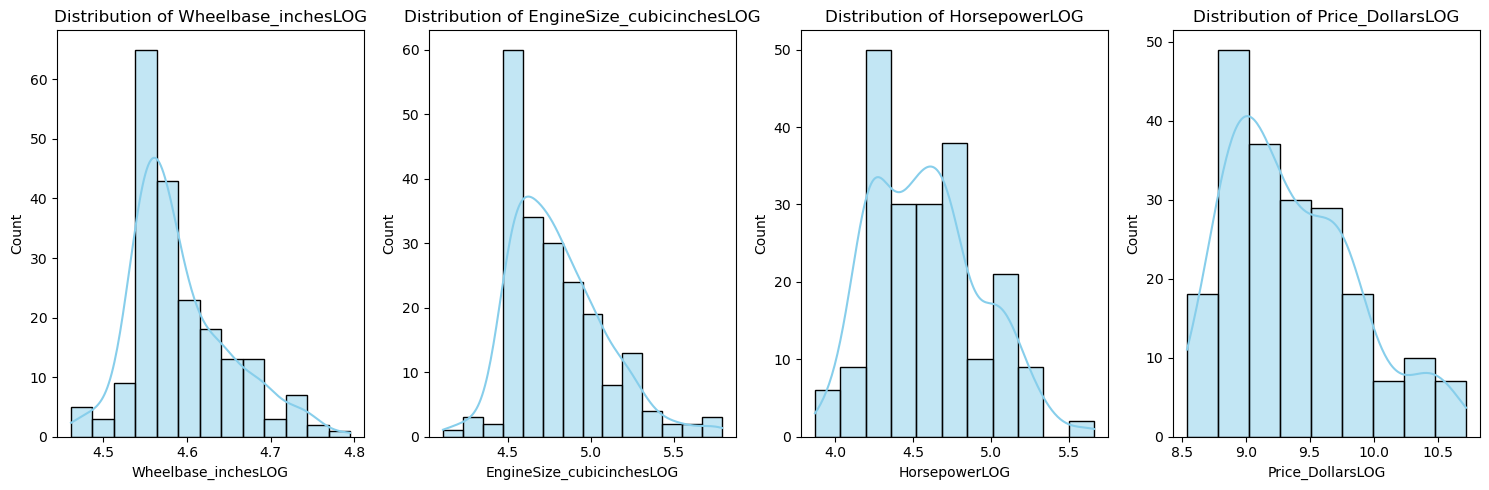

In [41]:
fig, axes = plt.subplots(nrows=1, ncols=len(selected_columns1), figsize=(15, 5))

for i, col in enumerate(selected_columns1):
    sns.histplot(df[col], ax=axes[i], kde=True, color='skyblue')
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


In [42]:
#Dropping original Columns

df = df.drop('Wheelbase_inches', axis=1)
df = df.drop('EngineSize_cubicinches', axis=1)
df = df.drop('Horsepower', axis=1)
df = df.drop('Price_Dollars', axis=1)

In [43]:
#handling outliers

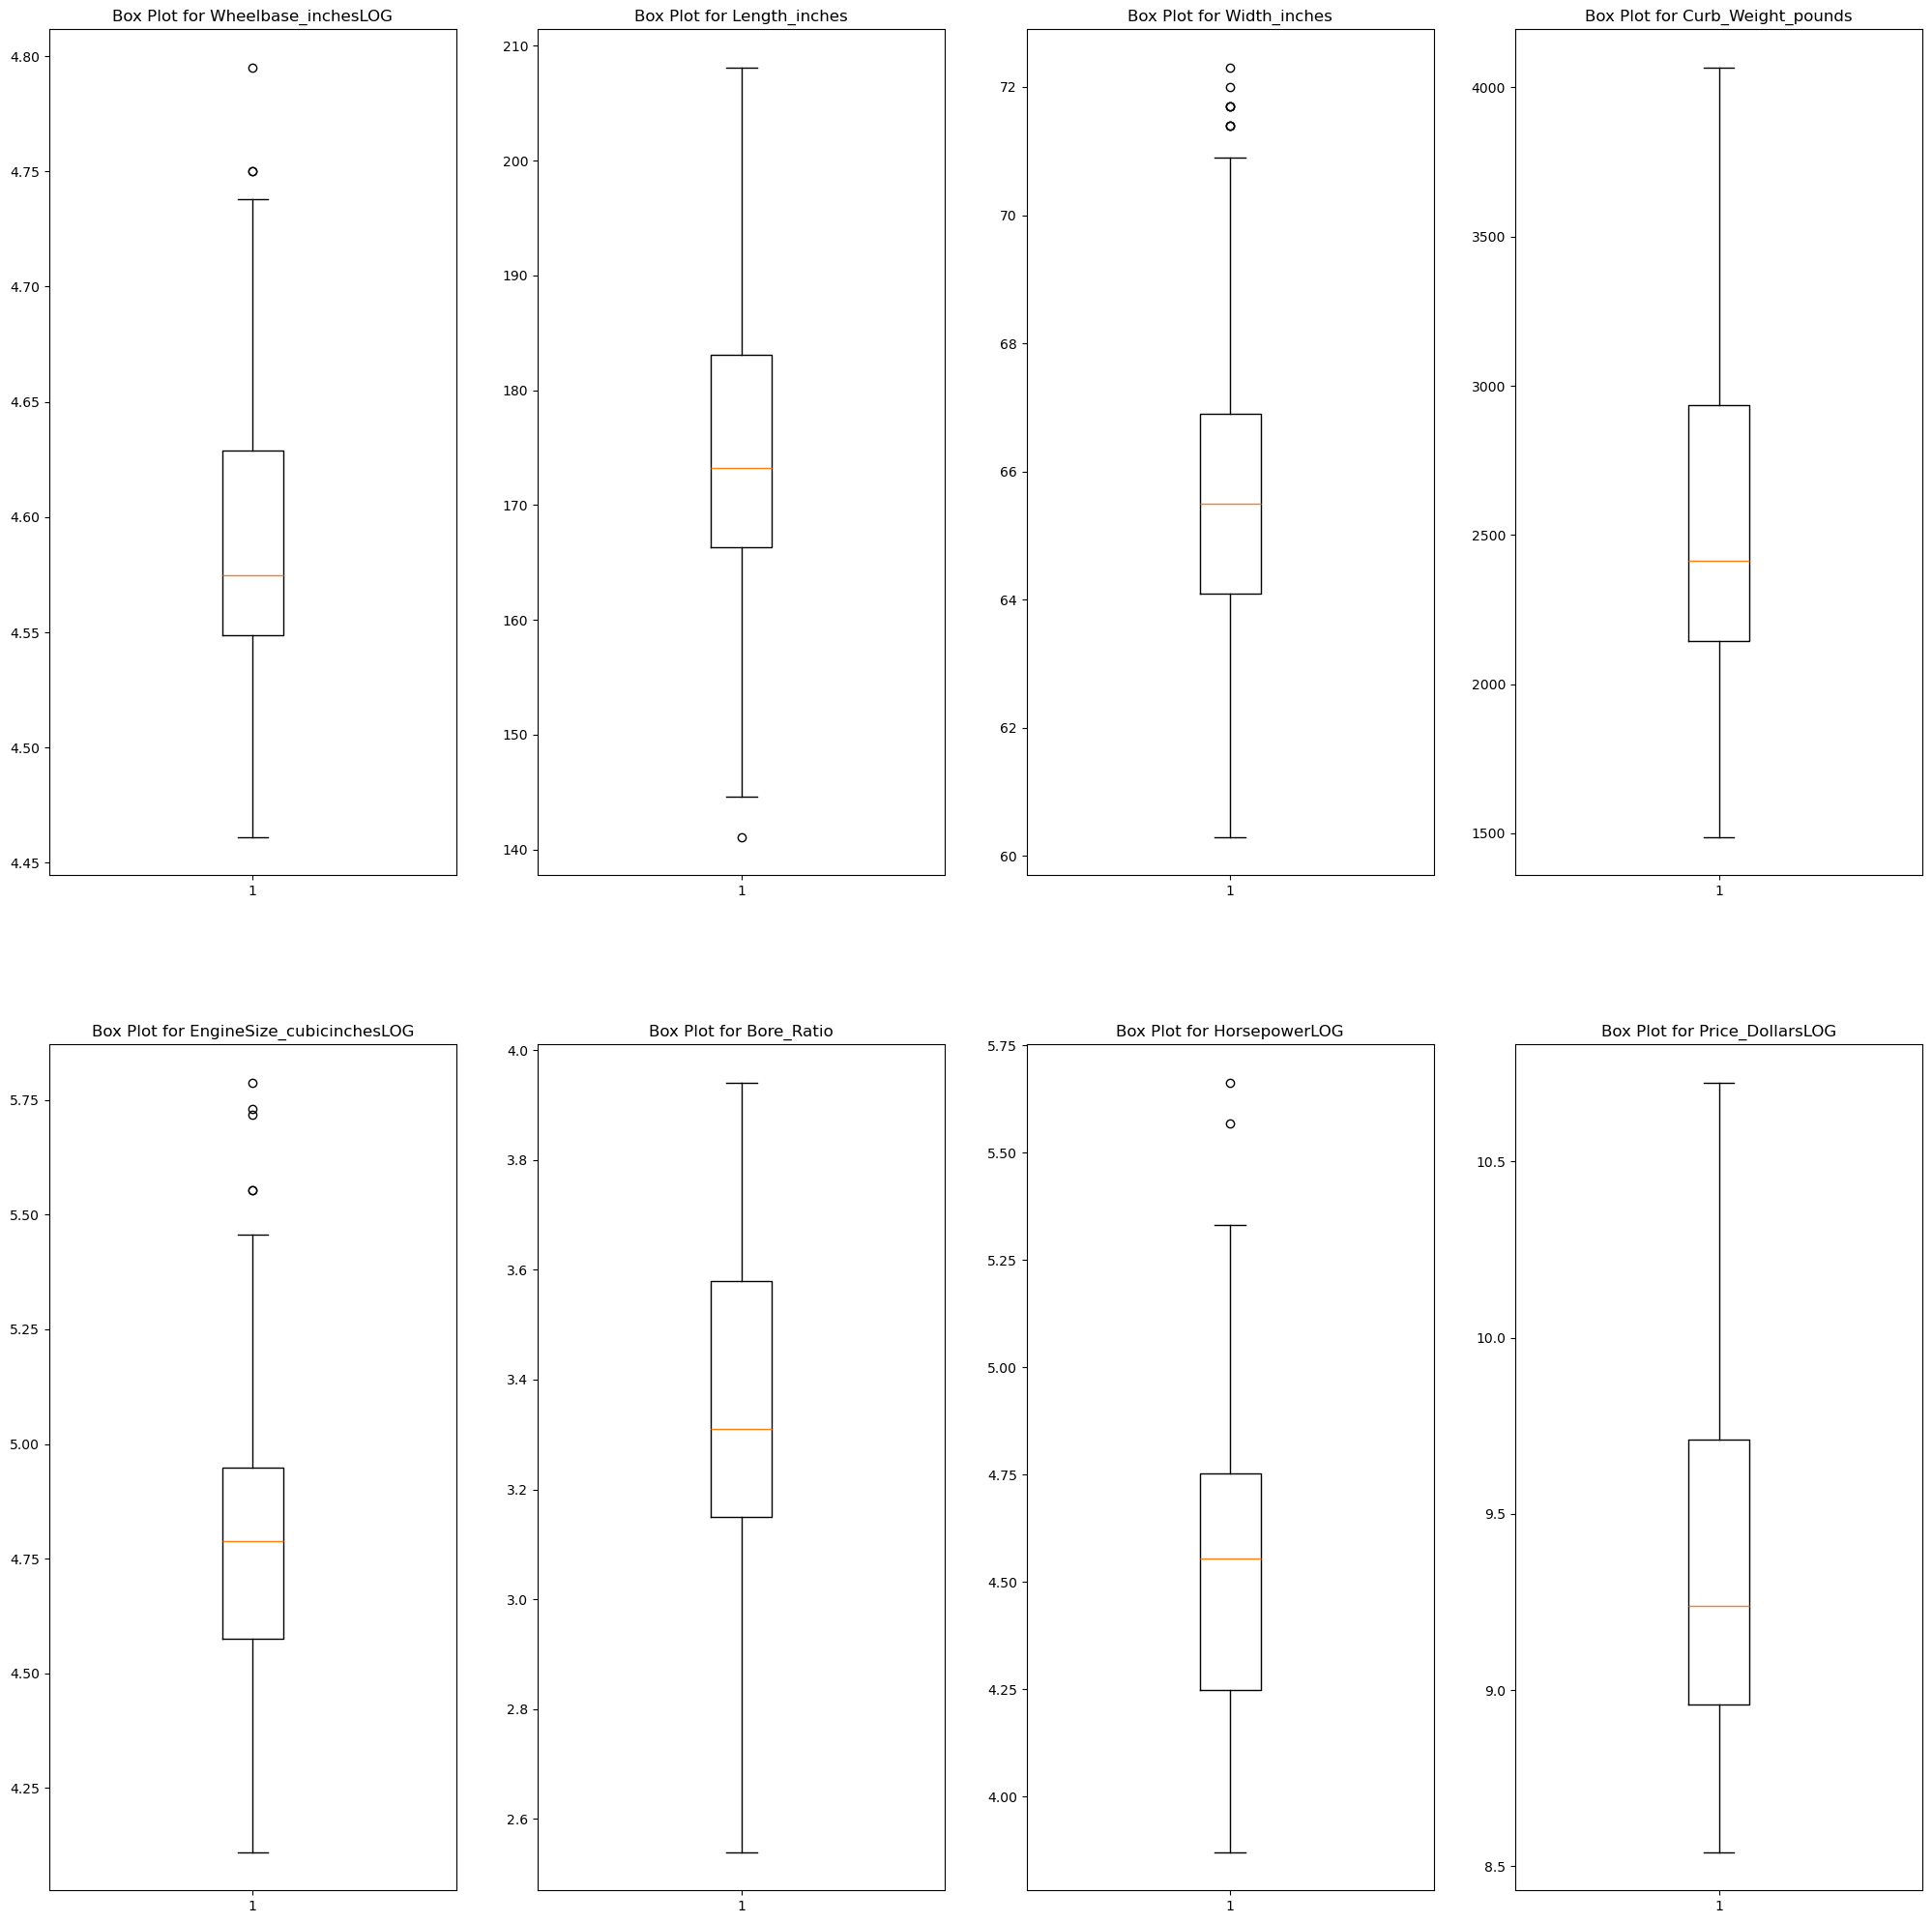

In [44]:
fig, axs = plt.subplots(2, 4, figsize=(25, 25))

# Plot box plots for each column
columns_to_plot = ['Wheelbase_inchesLOG', 'Length_inches', 'Width_inches',
       'Curb_Weight_pounds', 'EngineSize_cubicinchesLOG', 'Bore_Ratio', 'HorsepowerLOG', 'Price_DollarsLOG']

for i, col in enumerate(columns_to_plot):
    row_idx = i // 4
    col_idx = i % 4
    axs[row_idx, col_idx].boxplot(df[col])
    axs[row_idx, col_idx].set_title(f'Box Plot for {col}')

In [45]:
#Percentile Winsorization: Replace extreme values with percentiles


<Axes: ylabel='Wheelbase_inchesLOG'>

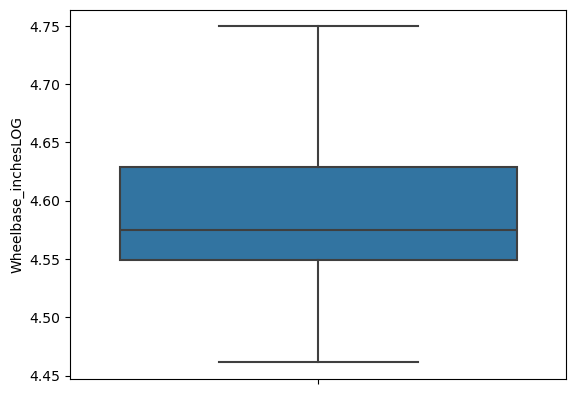

In [46]:
#Q1 (First Quartile): This is the 25th percentile. It’s the value below which 25% of the data falls.
#Q3 (Third Quartile): This is the 75th percentile. It’s the value below which 75% of the data falls.
#IQR (Interquartile Range): It’s the range between Q1 and Q3. It tells us how spread out the middle 50% of the data is.

q1 = df['Wheelbase_inchesLOG'].quantile(0.25)
q3 = df['Wheelbase_inchesLOG'].quantile(0.75)
iqr = q3 - q1

#calculating the lower limit and upper limit for potential outliers:
lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr

# Replace outliers with the nearest valid value (winsorization)
df['Wheelbase_inchesLOG'] = np.where(df['Wheelbase_inchesLOG'] < lower_limit, lower_limit, df['Wheelbase_inchesLOG'])
df['Wheelbase_inchesLOG'] = np.where(df['Wheelbase_inchesLOG'] > upper_limit, upper_limit, df['Wheelbase_inchesLOG'])
sns.boxplot(y = df["Wheelbase_inchesLOG"])


<Axes: ylabel='Width_inches'>

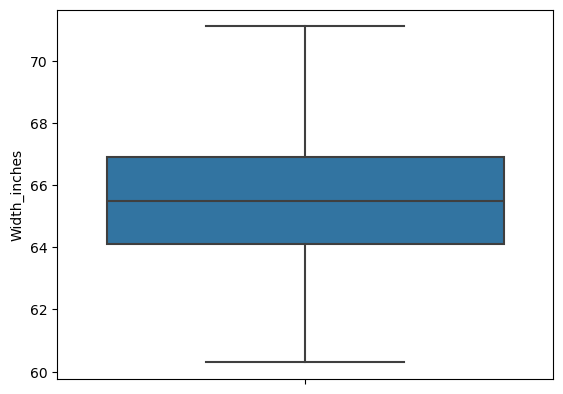

In [47]:

q1 = df['Width_inches'].quantile(0.25)
q3 = df['Width_inches'].quantile(0.75)
iqr = q3 - q1

lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr


df['Width_inches'] = np.where(df['Width_inches'] < lower_limit, lower_limit, df['Width_inches'])
df['Width_inches'] = np.where(df['Width_inches'] > upper_limit, upper_limit, df['Width_inches'])
sns.boxplot(y = df["Width_inches"])


<Axes: ylabel='EngineSize_cubicinchesLOG'>

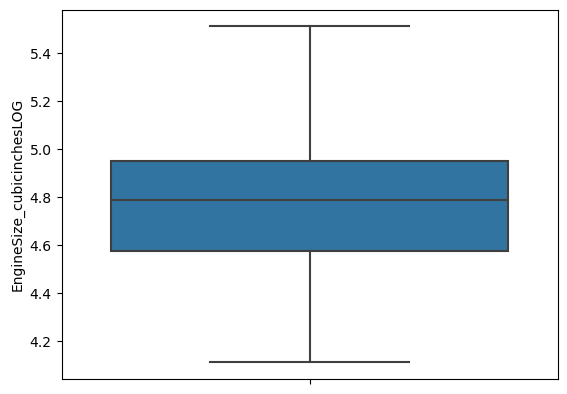

In [48]:

q1 = df['EngineSize_cubicinchesLOG'].quantile(0.25)
q3 = df['EngineSize_cubicinchesLOG'].quantile(0.75)
iqr = q3 - q1

lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr


df['EngineSize_cubicinchesLOG'] = np.where(df['EngineSize_cubicinchesLOG'] < lower_limit, lower_limit, df['EngineSize_cubicinchesLOG'])
df['EngineSize_cubicinchesLOG'] = np.where(df['EngineSize_cubicinchesLOG'] > upper_limit, upper_limit, df['EngineSize_cubicinchesLOG'])
sns.boxplot(y = df["EngineSize_cubicinchesLOG"])


<Axes: ylabel='HorsepowerLOG'>

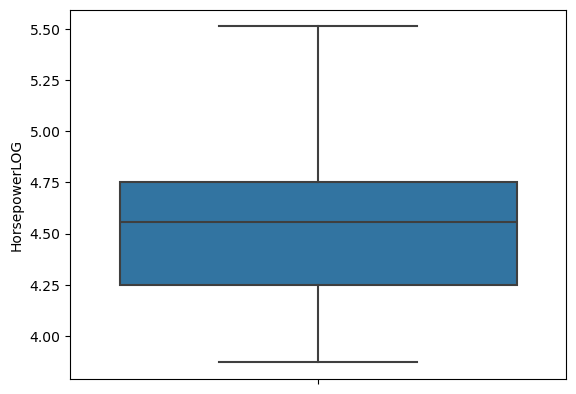

In [49]:

q1 = df['HorsepowerLOG'].quantile(0.25)
q3 = df['HorsepowerLOG'].quantile(0.75)
iqr = q3 - q1

lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr


df['HorsepowerLOG'] = np.where(df['HorsepowerLOG'] < lower_limit, lower_limit, df['HorsepowerLOG'])
df['HorsepowerLOG'] = np.where(df['HorsepowerLOG'] > upper_limit, upper_limit, df['HorsepowerLOG'])
sns.boxplot(y = df["HorsepowerLOG"])


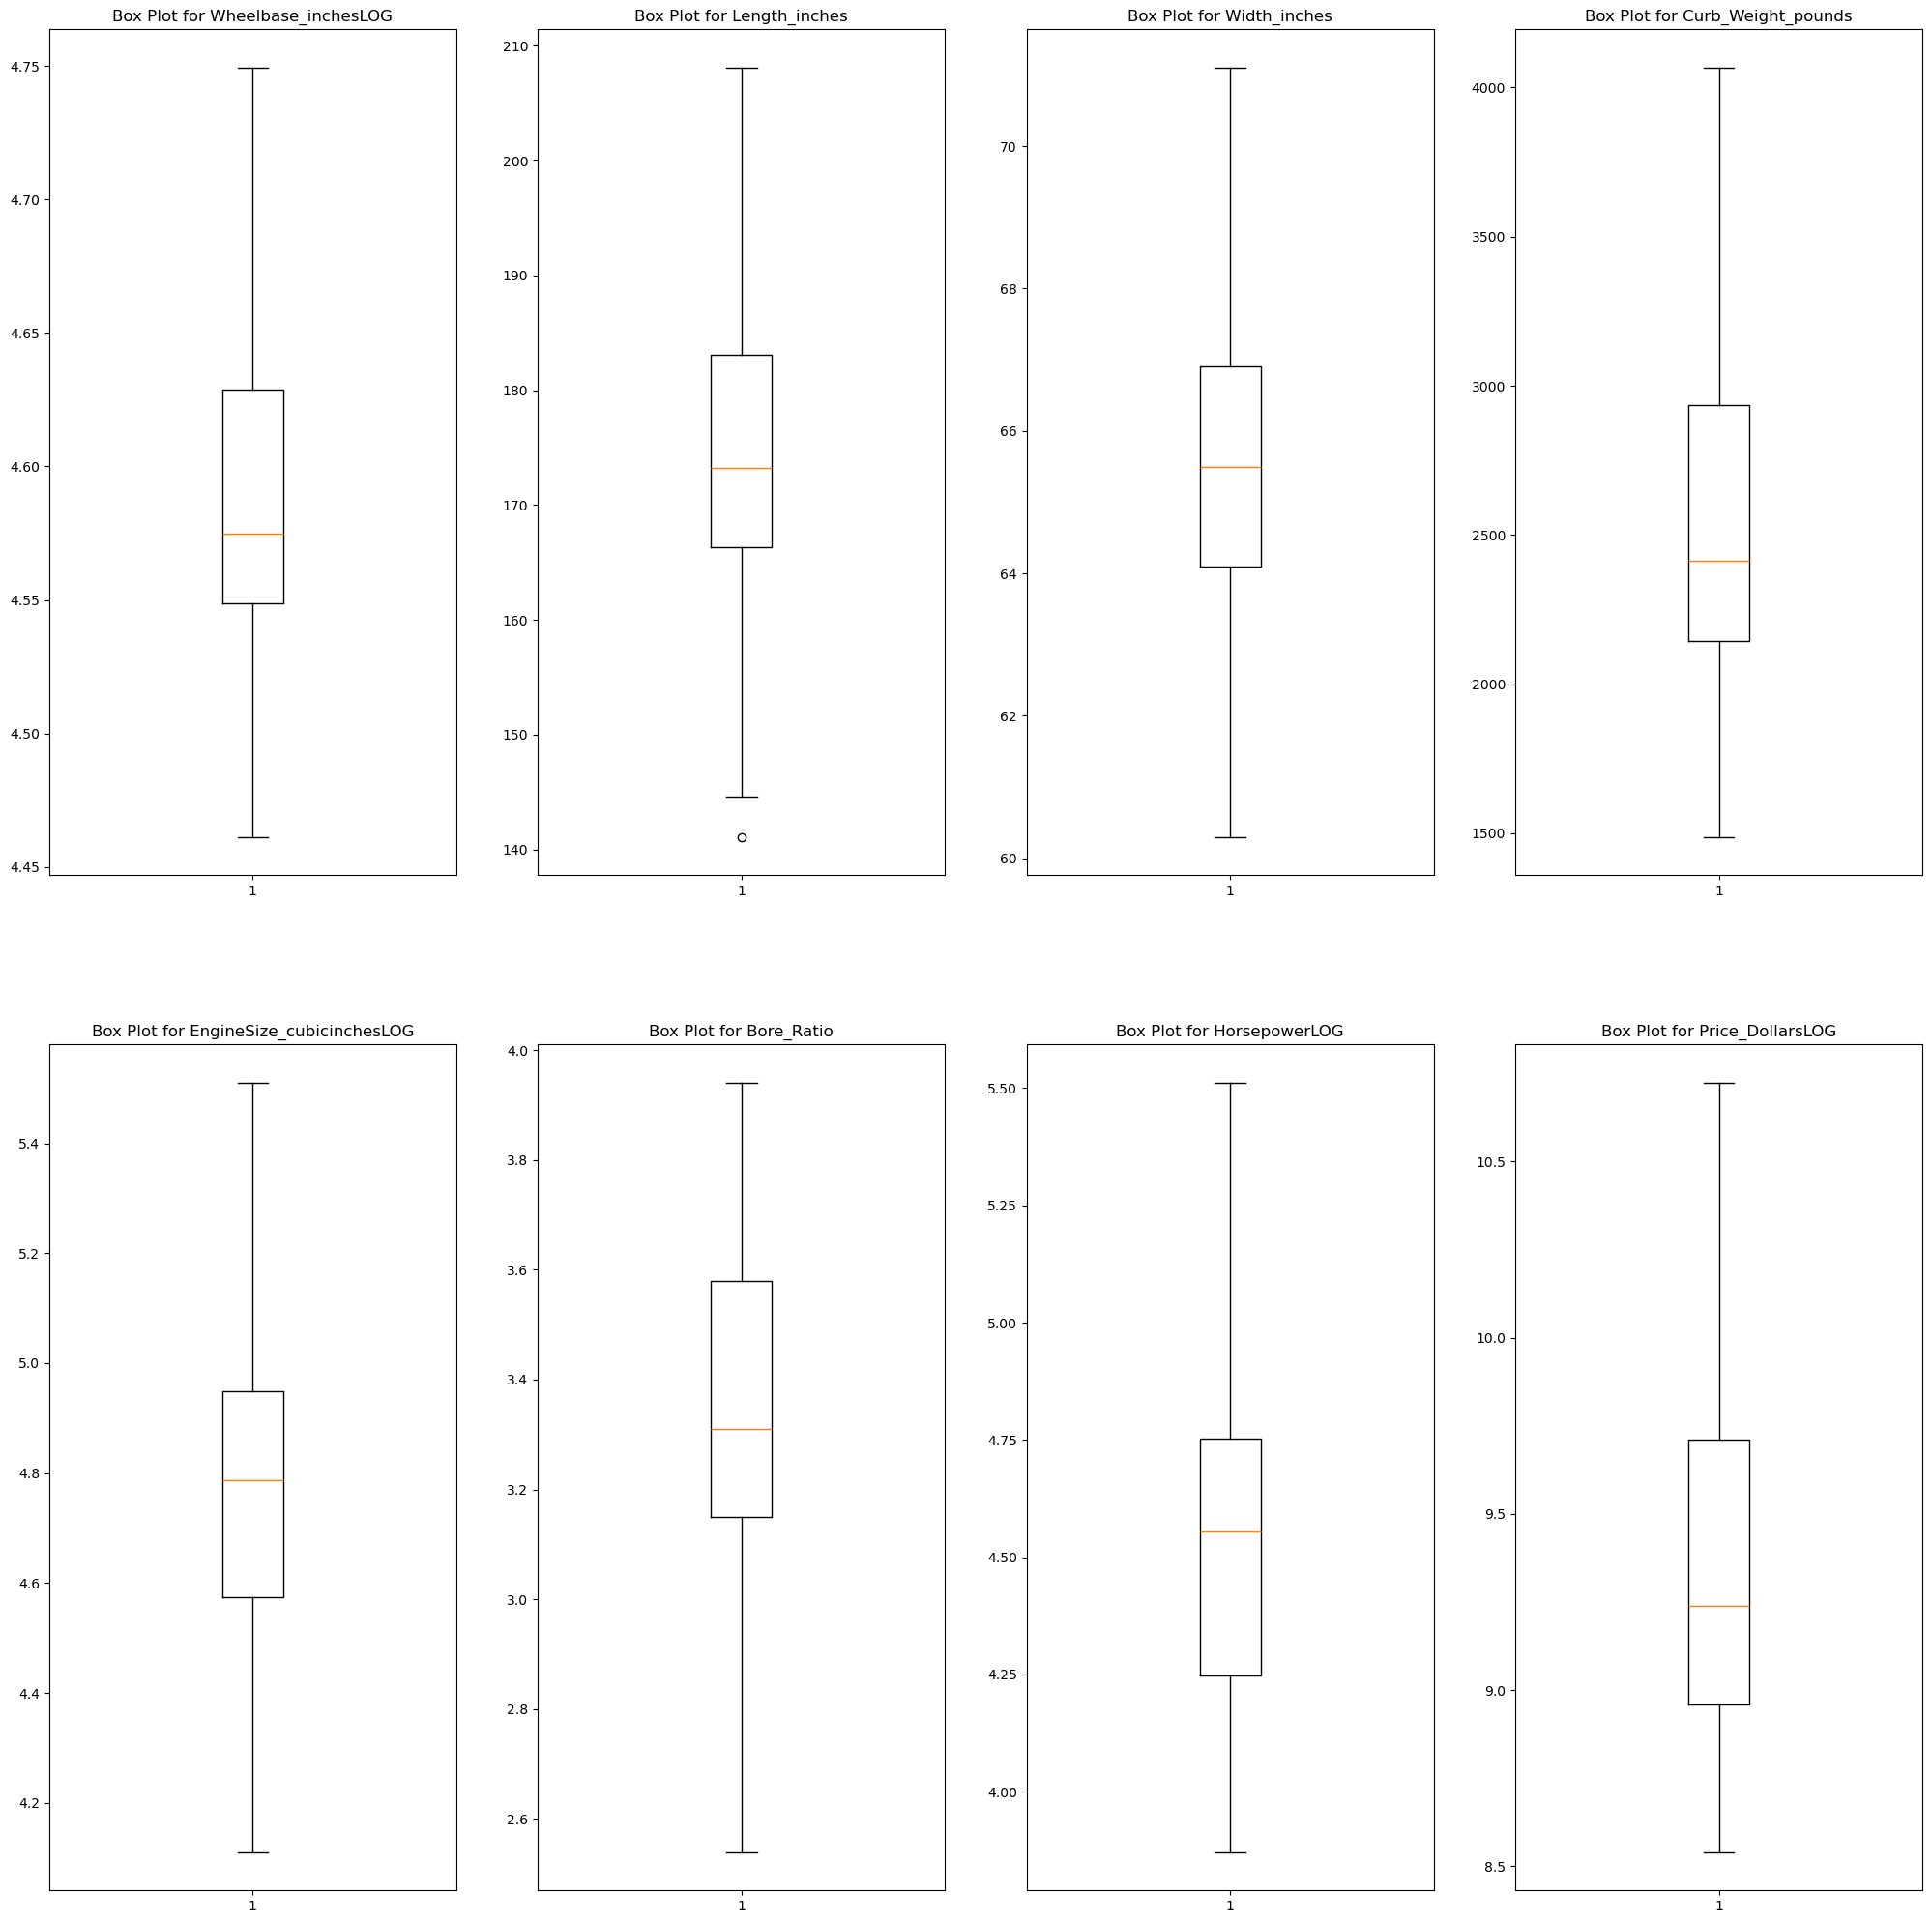

In [50]:
fig, axs = plt.subplots(2, 4, figsize=(25, 25))

# Plot box plots for each column
columns_to_plot = ['Wheelbase_inchesLOG', 'Length_inches', 'Width_inches',
       'Curb_Weight_pounds', 'EngineSize_cubicinchesLOG', 'Bore_Ratio', 'HorsepowerLOG', 'Price_DollarsLOG']

for i, col in enumerate(columns_to_plot):
    row_idx = i // 4
    col_idx = i % 4
    axs[row_idx, col_idx].boxplot(df[col])
    axs[row_idx, col_idx].set_title(f'Box Plot for {col}')

C:\Users\Harshal Malve\AppData\Local\Temp\ipykernel_15976\1154449209.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], ax=axes[i], label=f'Data {i+1}')
C:\Users\Harshal Malve\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Harshal Malve\AppData\Local\Temp\ipykernel_15976\1154449209.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `disp

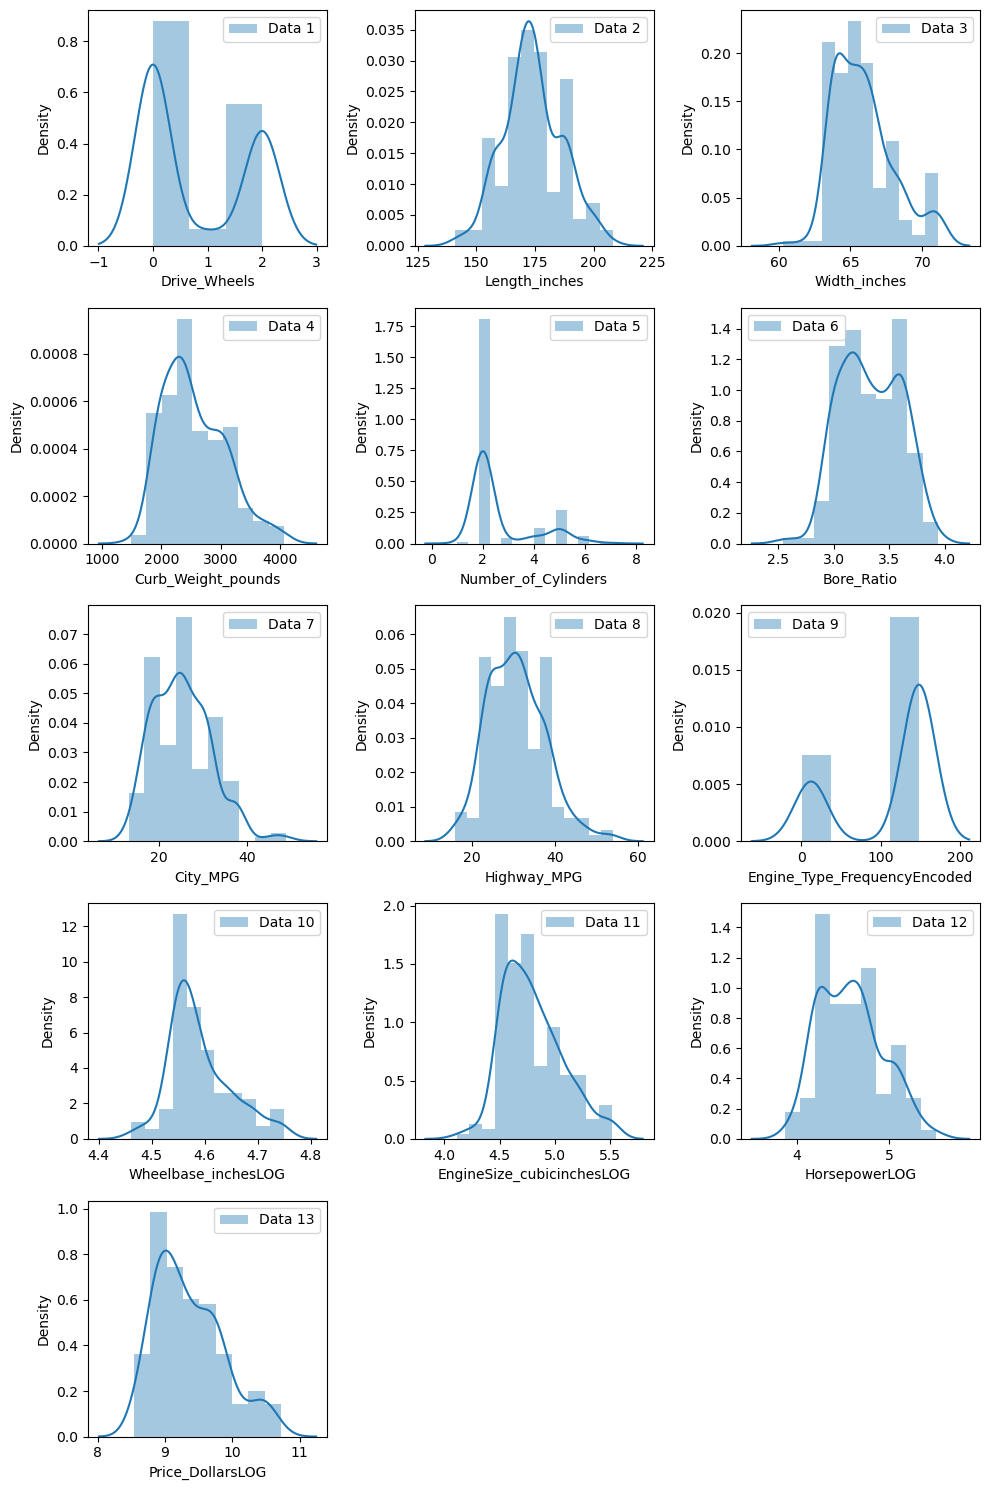

In [51]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
num_subplots = len(numeric_columns)

# Calculate the number of rows and columns for subplots
num_rows = 5  # You can adjust this based on your preference
num_cols = (num_subplots + num_rows - 1) // num_rows

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 15))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Plot the density plots for each numeric column
for i, col in enumerate(numeric_columns):
    sns.distplot(df[col], ax=axes[i], label=f'Data {i+1}')
    
    axes[i].legend()

# Hide any unused subplots
for j in range(num_subplots, num_rows * num_cols):
    axes[j].axis('off')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

In [52]:
df.columns

Index(['Drive_Wheels', 'Length_inches', 'Width_inches', 'Curb_Weight_pounds',
       'Number_of_Cylinders', 'Bore_Ratio', 'City_MPG', 'Highway_MPG',
       'Engine_Type_FrequencyEncoded', 'Wheelbase_inchesLOG',
       'EngineSize_cubicinchesLOG', 'HorsepowerLOG', 'Price_DollarsLOG'],
      dtype='object')

#as we can observe from above distribution chart most of the data is Gaussion/Noramal hence choosing MinMax scaler
#It brings all features into a consistent scale.

## 4.	Model Development: 

In [53]:
X=df.iloc[:,:-1] ## independent features

y=df.iloc[:,-1] ## dependent features

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [55]:
y_train

40      9.239414
60      9.047233
56      9.379661
101     9.510371
86      9.010547
         ...    
67     10.148471
192     9.535679
117     9.806426
47     10.381273
172     9.779567
Name: Price_DollarsLOG, Length: 143, dtype: float64

### Feature Importance

In [56]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [57]:
X.head()

,Drive_Wheels,Length_inches,Width_inches,Curb_Weight_pounds,Number_of_Cylinders,Bore_Ratio,City_MPG,Highway_MPG,Engine_Type_FrequencyEncoded,Wheelbase_inchesLOG,EngineSize_cubicinchesLOG,HorsepowerLOG
0,2,168.8,64.1,2548,2,3.47,21,27,12,4.484132,4.867534,4.709530
1,2,168.8,64.1,2548,2,3.47,21,27,12,4.484132,4.867534,4.709530
2,2,171.2,65.5,2823,5,2.68,19,26,13,4.548600,5.023881,5.036953
3,0,176.6,66.2,2337,2,3.19,24,30,148,4.603168,4.691348,4.624973
4,1,176.6,66.4,2824,4,3.19,18,22,148,4.599152,4.912655,4.744932


In [58]:
print(model.feature_importances_)

[0.11067349 0.02947726 0.05213017 0.22220222 0.12378574 0.01865656
 0.05636253 0.08267096 0.00722031 0.02622301 0.12447513 0.14612261]


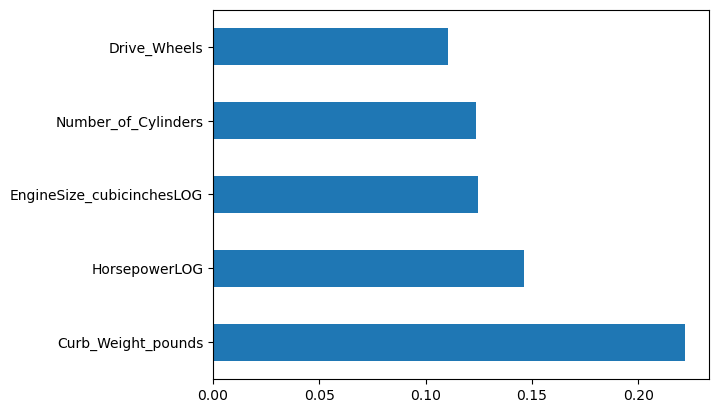

In [59]:

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

### Decision Tree Regressor

C:\Users\Harshal Malve\AppData\Local\Temp\ipykernel_15976\476133659.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y)
C:\Users\Harshal Malve\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price_DollarsLOG', ylabel='Density'>

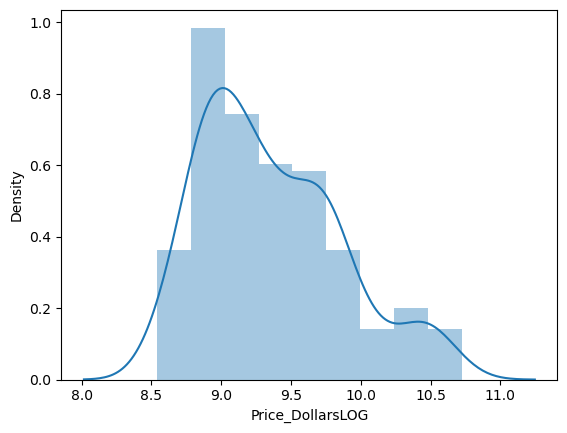

In [60]:
sns.distplot(y)

### Train Test split

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [62]:
from sklearn.tree import DecisionTreeRegressor

In [63]:
dtree=DecisionTreeRegressor(criterion="squared_error")

In [64]:
dtree.fit(X_train,y_train)

DecisionTreeRegressor()

In [65]:
print("Coefficient of determination R^2 <-- on train set: {}".format(dtree.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 0.9986247202067311


In [66]:
print("Coefficient of determination R^2 <-- on test set: {}".format(dtree.score(X_test, y_test)))


Coefficient of determination R^2 <-- on test set: 0.7842515730303569


In [67]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(dtree,X,y,cv=5)

In [68]:
score.mean()

0.6096763922931066

In [74]:
predictions=dtree.predict(X_test)

In [75]:
from sklearn import metrics

In [77]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
#print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.1725912449862757
RMSE: 0.23833071369732742


#### Model Evaluation